# Covid Cases and Lockdowns effect in Quebec | RDD

#### By Pavel Borovikov

> #### __Objective__ : 
> Use regression discontinuity design (__RDD__) to estimate the effect of 3 events on COVID-19 mesures (new cases, or deaths).
>> __Events__:
>> 1. The lockdown on the 20th of May 2020
>> 2. The reopening of schools on 31th of August 2020
>> 3. The lockdown on the 25th of December 2020

> ##### Notes:
> The events we are analysing are based in Quebec, Canada. The data used for this project comes from __[donneesquebec.ca](https://www.donneesquebec.ca/recherche/dataset/covid-19-portrait-quotidien-des-cas-confirmes/resource/d2cf4211-5400-46a3-9186-a81e6cd41de9)__ and portrays the amount of daily confirmed Covid-19 cases since February 24th 2020 for the entire province of Quebec.
<br><br>
This work is licensed under a __[Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/)__<br>
>> The data in our project was modified in the following ways:<br>
>> - The row of covid cases with an unknown date was removed.<br>
>> - Other columns have been added using the data provided in the original source.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as sc

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
url = 'https://msss.gouv.qc.ca/professionnels/statistiques/documents/covid19/COVID19_Qc_RapportINSPQ_HistoVigie.csv'
data = pd.read_csv(url).drop(0)
data.columns = ['date', 'total_cases', 'new_cases', 'total_deaths', 'CHSLD_total_deaths', 'RPA_total_deaths', 'DomInc_total_deaths', 'other_total_deaths', 'new_total_deaths', 'CHSLD_new_deaths', 'RPA_new_deaths', 'DomInc_new_deaths', 'other_new_deaths']
data['date'] = pd.to_datetime(data['date'])
df = data[['date', 'new_cases']]

In [6]:
print(df['date'].min())
print(df['date'].max())

2020-01-23 00:00:00
2023-01-11 00:00:00


### Data

The data available starts on January 23rd 2020 and is updated regululary as of January 12th 2023.

This project will only require a portion of the data.

### Events

The events are shown in the plot bellow with a -- line on the respective date.
The plot also shows new cases per day on the y axis.

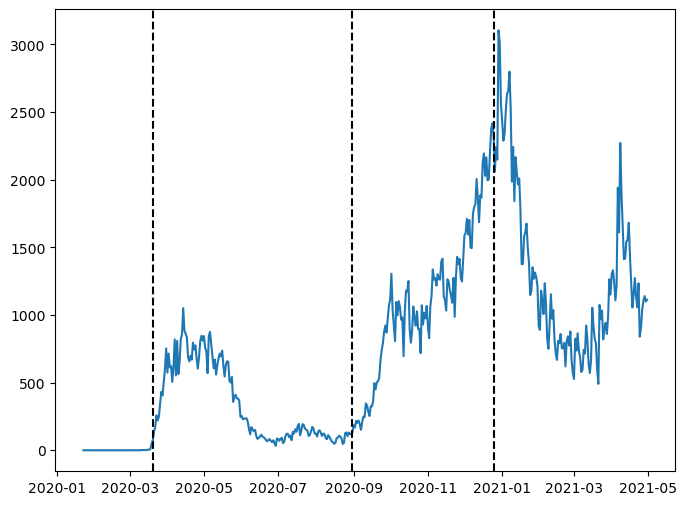

In [9]:
window = df[df['date'] < np.datetime64('2021-05-01')]

fig, ax = plt.subplots()
fig.set_size_inches(8,6)

ax.plot(window['date'], window['new_cases'])
ax.axvline(x=np.datetime64('2020-03-20'),color="black", linestyle="--")
ax.axvline(x=np.datetime64('2020-08-31'),color="black", linestyle="--")
ax.axvline(x=np.datetime64('2020-12-25'),color="black", linestyle="--")

plt.show()

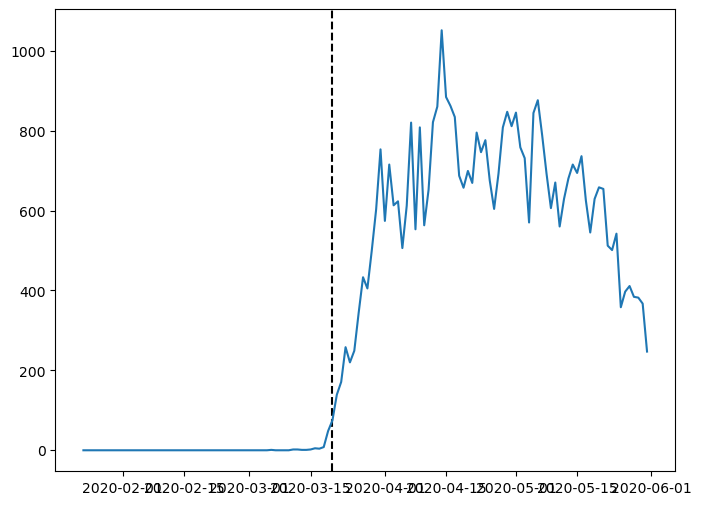

In [13]:
first_window = window[window['date'] < np.datetime64('2020-06-01')]

fig, ax = plt.subplots()
fig.set_size_inches(8,6)

ax.axvline(x=np.datetime64('2020-03-20'),color="black", linestyle="--")
ax.plot(first_window['date'], first_window['new_cases'])

plt.show()